In [42]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
%matplotlib inline

state 0
state 0
start_angle 3.606592653589793 
 origin [24  0]
start_point [ -0.13318227 -12.10741564]
end_angle 2.676592653589793 
 origin [24  0] 
 end_point [-0.13318227 12.10741564] 

start_angle 2.676592653589793 
 origin [24  0] 
 start_point [-0.13318227 12.10741564]
end_angle 2.0765926535897927 
 origin [24  0] 
 end_point [10.91838628 23.61930106] 

2.0765926535897927
[24  0]
[10.91838628 23.61930106]
[ -0.13318227 -12.10741564]


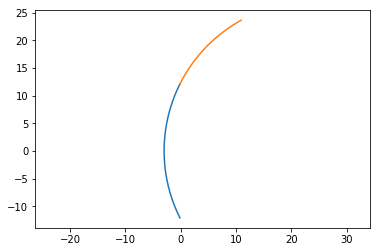

In [45]:
# bi-state 0 = bend to left --> draw link by moving through NEGATIVE angular displacement in regular cartesion FOR
# bi_state 1 = bend to right --> draw link by moving through POSITIVE angular displacement in regular cartesian FOR
# COA = central point of actuator 

def angle_to_Xdatum(point, o, r):
    x = 0
    y = 1
    origin = o
    radius = r
    acute_angle = np.arcsin(abs( origin[y] - point[y] ) / radius)
    quadrant = np.empty((2))
    quadrant[x] = 1 if (point[x] > origin[x]) else 0
    quadrant[y] = 1 if (point[y] > origin[y]) else 0

    if np.allclose(quadrant,  np.array([1, 1])):   angle = acute_angle
    elif np.allclose(quadrant,  np.array([0, 1])): angle = pi - acute_angle
    elif np.allclose(quadrant,  np.array([0, 0])): angle = pi + acute_angle
    else:                                          angle = 2 * pi - acute_angle
        
    return angle

    
    
def actuator_1way_series(n, *, 
                         radius = 27, 
                         bi_states = [0, 0, 1, 1, 0 ,0 ,0], 
                         arc_angle = 0.93, 
                         COA = [0, 0]): 
    "Plot 2D bistable actuators in a linked unidirectional series from a vertically aligned start section"
    
    numsegments = 1000
    x = 0
    y = 1   
    
    state = bi_states[n-1]
    print(f"state {state}")
    
    
    if n == 1:        
        # angle of start of arc relative to horizontal datum
        # actuator centre is midpoint of the chord of the first link
        if state:
            start_angle = (0 - (arc_angle / 2)) 
        else:
            start_angle = (pi + (arc_angle / 2))            
        
        # origin of the arc
        sagitta = radius * (1 - np.cos(arc_angle / 2))
        origin = np.array(COA)
        origin[x] += (radius - sagitta) * (-1 if state else 1) 
        
        print(f"start_angle {start_angle} \n origin {origin}")    
            
    
    else:            
        # angle of start of arc relative to horizontal datum
        start_angle, origin, start_point, start_point_init, origin_init  = actuator_1way_series(n-1)
        print(f"start_angle {start_angle} \n origin {origin} \n start_point {start_point}")
        
        
        # if the bistable state is not same as previous link ... 
        if bi_states[n-1]!=bi_states[n-2]:
            # mirror origin of the arc in tangent to start point
            origin = start_point + np.array([radius * np.cos(start_angle),                                             
                                             radius * np.sin(start_angle)])
            
            print("origin changed to", origin)
            start_angle = angle_to_Xdatum(start_point, origin, radius)
    
    
    # plot arcs 
    arc_points = np.linspace(start_angle, 
                             start_angle + (arc_angle * (1 if state else -1)), 
                             numsegments)    

    arc = np.array([origin[x] + radius * np.cos(arc_points), 
                    origin[y] + radius * np.sin(arc_points)])
   
    plt.plot(arc[x], arc[y])
    plt.xlim(0, 40)
    plt.ylim(0, 40)
    plt.axis('equal')
    plt.plot(origin[x], origin[y], 'ro')
 
    

    # store initial condition for bidirectional actuator constrauction
    if n == 1:
        start_point = arc[:, 0]
        print("start_point", start_point)
        
        start_point_init = start_point
        origin_init = origin 
        
    
    # end angle (between end_point-origin and 1st quadrant horizontal datum)
    end_point = arc[:, -1]   
    end_angle = angle_to_Xdatum(end_point, 
                                origin, radius)
    
    print(f"end_angle {end_angle} \n origin {origin} \n end_point {end_point} \n")
        
    return end_angle, origin, end_point, start_point_init, origin_init    
    
    
F = actuator_1way_series(2, arc_angle = 0.6)
# plt.xlim(0, 40)
# plt.ylim(0, 40)
# plt.axis('equal')        
print(F[0])   
print(F[1])  
print(F[2])  
print(F[3])  
  
        
        
        
        
        
        
        
        
        

state 0
state 1
start_angle -0.465 
 origin [-24   0]
start_point [  0.13318227 -12.10741564]
end_angle 0.465 
 origin [-24   0] 
 end_point [ 0.13318227 12.10741564] 

start_angle 0.465 
 origin [-24   0] 
 start_point [ 0.13318227 12.10741564]
origin changed to [24.26636454 24.21483128]
end_angle 3.006592653589793 
 origin [24.26636454 24.21483128] 
 end_point [-2.4879714  27.84876968] 

3.006592653589793
[24.26636454 24.21483128]
[-2.4879714  27.84876968]
[  0.13318227 -12.10741564]


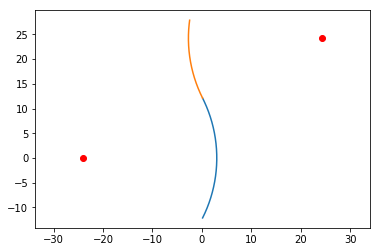

In [46]:
# bi-state 0 = bend to left --> draw link by moving through NEGATIVE angular displacement in regular cartesion FOR
# bi_state 1 = bend to right --> draw link by moving through POSITIVE angular displacement in regular cartesian FOR
# COA = central point of actuator 

def angle_to_Xdatum(point, o, r):
    "Returns angle between point-origin and 1st quadrant horizontal datum"
    x = 0
    y = 1
    origin = o
    radius = r
    acute_angle = np.arcsin(abs( origin[y] - point[y] ) / radius)
    quadrant = np.empty((2))
    quadrant[x] = 1 if (point[x] > origin[x]) else 0
    quadrant[y] = 1 if (point[y] > origin[y]) else 0

    if np.allclose(quadrant,  np.array([1, 1])):   angle = acute_angle
    elif np.allclose(quadrant,  np.array([0, 1])): angle = pi - acute_angle
    elif np.allclose(quadrant,  np.array([0, 0])): angle = pi + acute_angle
    else:                                          angle = 2 * pi - acute_angle
        
    return angle

# def redefine_arc_origin(point, angle_to_Xdatum, r):
#     " Redfines the arc origin by mirroring the present origin in the tanget to the arc at the point"
#     start_point = point
#     start_angle = angle_to_Xdatum
#     radius = r
    
#     origin = start_point + np.array([radius * np.cos(start_angle),                                             
#                                      radius * np.sin(start_angle)])

#     print("origin changed to", origin)
    
    
    
def actuator_1way_series(n, *, 
                         radius = 27, 
                         bi_states = [1, 0, 1, 1, 0 ,0 ,0], 
                         arc_angle = 0.93, 
                         COA = [0, 0]): 
    "Plot 2D bistable actuators in a linked unidirectional series from a vertically aligned start section"
    
    numsegments = 1000
    x = 0
    y = 1   
    
    state = bi_states[n-1]
    print(f"state {state}")
    
    
    if n == 1:        
        # angle of start of arc relative to horizontal datum
        # actuator centre is midpoint of the chord of the first link
        if state:
            start_angle = (0 - (arc_angle / 2)) 
        else:
            start_angle = (pi + (arc_angle / 2))            
        
        # origin of the arc
        sagitta = radius * (1 - np.cos(arc_angle / 2))
        origin = np.array(COA)
        origin[x] += (radius - sagitta) * (-1 if state else 1) 
        
        print(f"start_angle {start_angle} \n origin {origin}")    
            
    
    else:            
        # angle of start of arc relative to horizontal datum
        start_angle, origin, start_point, start_point_init, origin_init  = actuator_1way_series(n-1)
        print(f"start_angle {start_angle} \n origin {origin} \n start_point {start_point}")
        
        
        # if the bistable state is not same as previous link ... 
        if bi_states[n-1]!=bi_states[n-2]:
#             # mirror origin of the arc in tangent to start point
            origin = start_point + np.array([radius * np.cos(start_angle),                                             
                                             radius * np.sin(start_angle)])
            
            print("origin changed to", origin)
            start_angle = angle_to_Xdatum(start_point, origin, radius)
    
    
    # plot arcs 
    arc_points = np.linspace(start_angle, 
                             start_angle + (arc_angle * (1 if state else -1)), 
                             numsegments)    

    arc = np.array([origin[x] + radius * np.cos(arc_points), 
                    origin[y] + radius * np.sin(arc_points)])
   
    plt.plot(arc[x], arc[y])
    plt.plot(origin[x], origin[y], 'ro')
    plt.xlim(0, 40)
    plt.ylim(0, 40)
    plt.axis('equal') 
    

    # store initial condition for bidirectional actuator constrauction
    if n == 1:
        start_point = arc[:, 0]
        print("start_point", start_point)
        
        start_point_init = start_point
        origin_init = origin 
        
    
    # end angle (between end_point-origin and 1st quadrant horizontal datum)
    end_point = arc[:, -1]   
    end_angle = angle_to_Xdatum(end_point, 
                                origin, radius)
    
    print(f"end_angle {end_angle} \n origin {origin} \n end_point {end_point} \n")
        
    return end_angle, origin, end_point, start_point_init, origin_init    
    
    
F = actuator_1way_series(2, arc_angle = 0.6)       
print(F[0])   
print(F[1])  
print(F[2])  
print(F[3])  
  
        
        
        
        
        
        
        
        
        

state 1
state 0
state 1
start_angle -0.465 
 origin [-24   0]
start_point [  0.13318227 -12.10741564]
end_angle 0.465 
 origin [-24   0] 
 end_point [ 0.13318227 12.10741564] 

start_angle 0.465 
 origin [-24   0] 
 start_point [ 0.13318227 12.10741564]
end_angle 5.818185307179586 
 origin [-24   0] 
 end_point [  0.13318227 -12.10741564] 

origin changed to [ 24.26636454 -24.21483128]
start_angle 5.818185307179586 
 origin [ 24.26636454 -24.21483128] 
 start_point [  0.13318227 -12.10741564]
(2.0765926535897927, array([-14.55581869, 101.59739186]), array([-27.63743241, 125.21669292]), array([  0.13318227, -12.10741564]), array([-24,   0]))


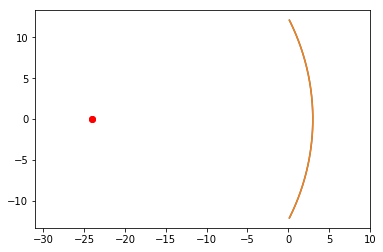

In [36]:
def actuator_2way_series(actuator_1way_series,
                         *, 
                         nLinksdir1, nLinksdir2, 
                         bi_states_dir1 = [0, 0, 1, 1, 0 ,0 ,0], 
                         bi_states_dir2 = [1, 0, 1, 1, 0 ,0 ,0], 
                         link_radius = 27, 
                         link_arc_angle = 0.93): 
    "Plot 2D bistable actuators in linked series' extending bidirectionally from a vertically aligned start section"
    
    numsegments = 1000
    x = 0
    y = 1

    n = nLinksdir2
    state = bi_states_dir2[n-1]
    print("state", state)  
    

    if n == 1:   
        # import information about exisiting actuator section 
        end_angle_dir1, end_origin_dir1, end_point_dir1, start_point_dir1, origin_dir1 = actuator_1way_series(
        nLinksdir1,
        radius = link_radius, 
        bi_states = bi_states_dir1, 
        arc_angle = link_arc_angle,
        COA = [0, 0]
        )     
        
        origin = origin_dir1
        start_point = start_point_dir1
        radius = link_radius
        arc_angle = link_arc_angle
        
        
        # angle of point at start of arc 
        start_angle = angle_to_Xdatum(start_point, origin, radius)
        
        
        # if bistable state is not same as first link of exisiting actuator section ... 
        if bi_states_dir1[0] != bi_states_dir2[0]:         
            # mirror origin 
            origin = start_point + np.array([radius * np.cos(start_angle),                                             
                                             radius * np.sin(start_angle)])
            
            print("origin changed to", origin)
        print(f"start_angle {start_angle} \n origin {origin} \n start_point {start_point}")
        
        
        # redefine start angle 
        start_angle = angle_to_Xdatum(start_point, origin, radius)
        
#         # plot arcs 
#         arc_points = np.linspace(start_angle, 
#                                  start_angle + (arc_angle * (-1 if state else 1)), 
#                                  numsegments)    

#         arc = np.array([origin[x] + radius * np.cos(arc_points), 
#                         origin[y] + radius * np.sin(arc_points)])

#         plt.plot(arc[x], arc[y])
#         plt.plot(origin[x], origin[y], 'ro')
        
#     else:
        
#         # angle of start of arc relative to horizontal datum
#         start_angle, origin, start_point, start_point_init, origin_init  = actuator_1way_series(n-1)
#         print(f"start_angle {start_angle} \n origin {origin} \n start_point {start_point}")
        
        
#         # if the bistable state is not same as previous link ... 
#         if bi_states[n-1]!=bi_states[n-2]:
#             # mirror origin of the arc in tangent to start point
#             origin = start_point + np.array([radius * np.cos(start_angle),                                             
#                                              radius * np.sin(start_angle)])
            
#             print("origin changed to", origin)
#             start_angle = angle_to_Xdatum(start_point, origin, radius)
            
            
            
actuator_2way_series(actuator_1way_series, nLinksdir1=2, nLinksdir2=1)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.axis('equal')        
print(F)